In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.initializers import Constant
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from keras.models import Sequential,Model
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Input,Bidirectional
from keras.layers import *
import time

In [4]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/sidthechillguy/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/sidthechillguy/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/sidthechillguy/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/sidthechillguy/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/sidthechillguy/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to
[nltk_data]    |  

True

In [3]:
df = pd.read_csv('isear_csv.csv', sep=',', encoding='ISO-8859-1')

df = df[['Field1', 'SIT']]

class_num = 7
class_name = ['joy','fear','anger','sadness','disgust','shame','guilt']

text = df['SIT'].values

labels = df['Field1'].values

encoding = {'joy':0, 'fear':1, 'anger':2, 'sadness':3, 'disgust':4, 'shame':5, 'guilt':6}

labels = [encoding[x] for x in labels]

labels = to_categorical(labels)

In [4]:
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)
padded_sequences = pad_sequences(sequences, maxlen=max_len)

In [7]:
embedding_dim = 100
embedding_mat = np.zeros((max_words, embedding_dim))
embedder = 'glove.6B.100d.txt'

with open(embedder) as f:
    for line in f:
        word, *vector = line.split()
        if word in tokenizer.word_index and int(tokenizer.word_index[word]) < max_words:
            idx = tokenizer.word_index[word]
            embedding_mat[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

In [8]:
X_train,X_test, y_train,y_test = train_test_split(padded_sequences,labels, test_size=0.3, random_state=555)


In [9]:
modelCNN = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, 100, input_shape=(max_len,)),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='sigmoid')
])

2024-04-29 19:14:59.317035: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-29 19:15:04.222249: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-29 19:15:04.222367: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-29 19:15:04.231126: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-29 19:15:04.231202: I external/local_xla/xla/stream_executor

In [10]:
modelCNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
modelCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 conv1d (Conv1D)             (None, 96, 64)            32064     
                                                                 
 max_pooling1d (MaxPooling1  (None, 24, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 20, 128)           41088     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 5, 128)            0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 640)               0

In [12]:
histCNN = modelCNN.fit(X_train,y_train, epochs = 30, batch_size = 128, validation_data=(X_test,y_test))

Epoch 1/30


2024-04-29 19:15:34.310837: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-04-29 19:15:37.314816: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-29 19:15:41.705416: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-29 19:15:44.782356: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f4d703d7700 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-29 19:15:44.782412: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-04-29 19:15:45.014820: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1714398345.567255    6629 devic

42/42 [==============================] - 24s 143ms/step - loss: 0.4611 - accuracy: 0.1469 - val_loss: 0.4118 - val_accuracy: 0.1561
Epoch 2/30
42/42 [==============================] - 4s 89ms/step - loss: 0.4090 - accuracy: 0.1662 - val_loss: 0.4095 - val_accuracy: 0.1552
Epoch 3/30
42/42 [==============================] - 2s 55ms/step - loss: 0.4031 - accuracy: 0.1960 - val_loss: 0.4013 - val_accuracy: 0.1917
Epoch 4/30
42/42 [==============================] - 2s 52ms/step - loss: 0.3789 - accuracy: 0.2697 - val_loss: 0.3877 - val_accuracy: 0.2630
Epoch 5/30
42/42 [==============================] - 2s 41ms/step - loss: 0.3299 - accuracy: 0.4338 - val_loss: 0.3593 - val_accuracy: 0.3700
Epoch 6/30
42/42 [==============================] - 2s 40ms/step - loss: 0.2522 - accuracy: 0.6187 - val_loss: 0.3558 - val_accuracy: 0.4457
Epoch 7/30
42/42 [==============================] - 2s 43ms/step - loss: 0.1782 - accuracy: 0.7622 - val_loss: 0.3797 - val_accuracy: 0.4722
Epoch 8/30
42/42 [====

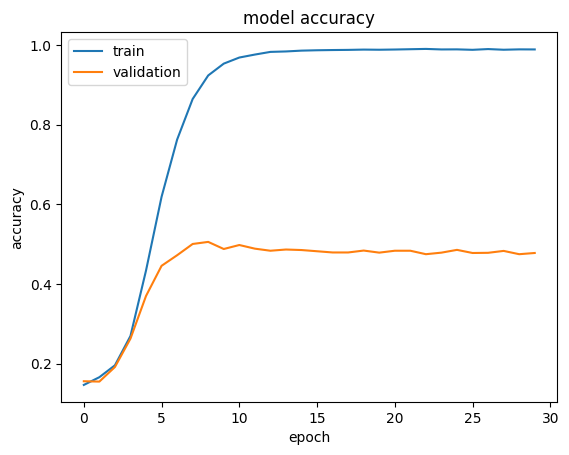

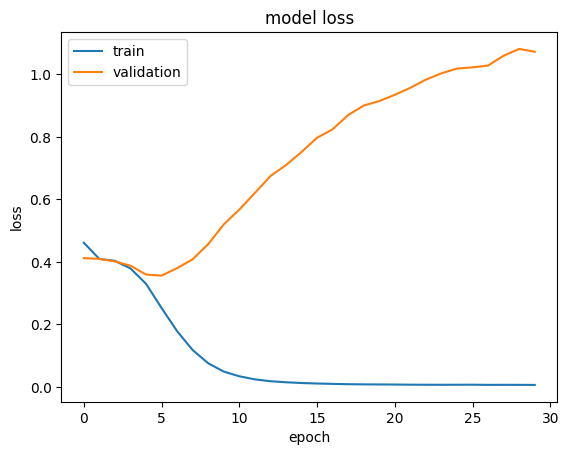

In [13]:
# Accuracy plot
plt.plot(histCNN.history['accuracy'])
plt.plot(histCNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(histCNN.history['loss'])
plt.plot(histCNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [18]:
kernel_size = 3
filters = 256

modelCNN2 = Sequential()
modelCNN2.add(Input(shape = (max_len,)))
modelCNN2.add(Embedding(max_words,
                         100,
                         input_length=max_len,
                         embeddings_initializer = Constant(embedding_mat),
                         trainable=False))
modelCNN2.add(Conv1D(filters, kernel_size, activation='relu'))
modelCNN2.add(GlobalMaxPooling1D())
modelCNN2.add(Dense(256, activation='relu'))
modelCNN2.add(Dense(class_num, activation='softmax'))

modelCNN2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [19]:
modelCNN2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 conv1d_2 (Conv1D)           (None, 98, 256)           77056     
                                                                 
 global_max_pooling1d (Glob  (None, 256)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 1144647 (4.37 MB)
Trainable params: 144647 (565.03 KB)
Non-trainable params: 1000000 (3.81 MB)
___________

In [20]:
histCNN2 = modelCNN2.fit(X_train,y_train, epochs = 6, batch_size = 128, validation_data=(X_test,y_test))

Epoch 1/6
42/42 [==============================] - 4s 29ms/step - loss: 1.8275 - accuracy: 0.2862 - val_loss: 1.6684 - val_accuracy: 0.3652
Epoch 2/6
42/42 [==============================] - 0s 8ms/step - loss: 1.4733 - accuracy: 0.4678 - val_loss: 1.4188 - val_accuracy: 0.4974
Epoch 3/6
42/42 [==============================] - 0s 8ms/step - loss: 1.2058 - accuracy: 0.5809 - val_loss: 1.3331 - val_accuracy: 0.5187
Epoch 4/6
42/42 [==============================] - 0s 9ms/step - loss: 1.0087 - accuracy: 0.6545 - val_loss: 1.2438 - val_accuracy: 0.5513
Epoch 5/6
42/42 [==============================] - 0s 8ms/step - loss: 0.8613 - accuracy: 0.7113 - val_loss: 1.2138 - val_accuracy: 0.5617
Epoch 6/6
42/42 [==============================] - 0s 8ms/step - loss: 0.7228 - accuracy: 0.7721 - val_loss: 1.2245 - val_accuracy: 0.5748


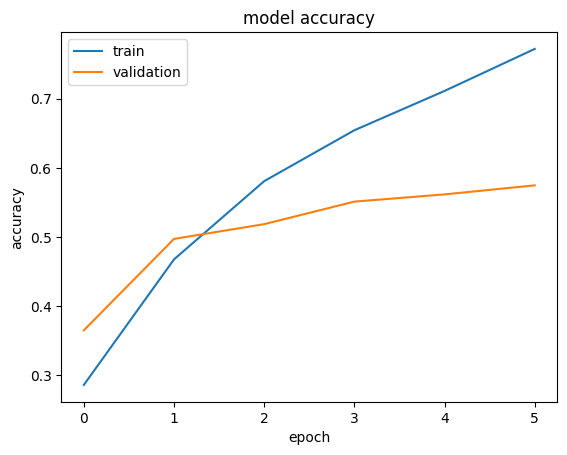

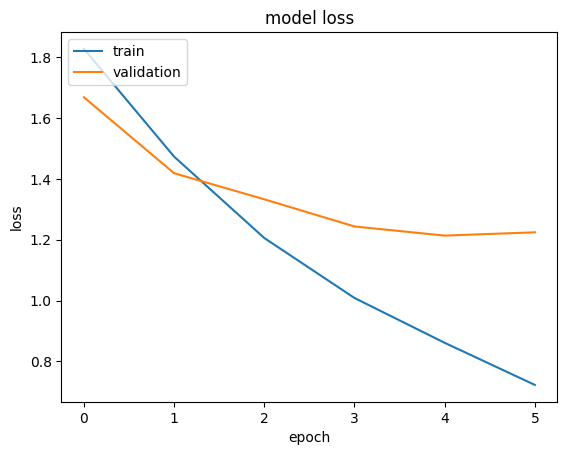

In [21]:
# Accuracy plot
plt.plot(histCNN2.history['accuracy'])
plt.plot(histCNN2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(histCNN2.history['loss'])
plt.plot(histCNN2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [28]:
modelLSTM = Sequential()
modelLSTM.add(Embedding(max_words, embedding_dim, embeddings_initializer=Constant(embedding_mat), input_length=max_len))
modelLSTM.add(LSTM(units=128, activation='tanh'))
modelLSTM.add(Dense(class_num, activation='softmax'))
modelLSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
modelLSTM.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_5 (Dense)             (None, 7)                 903       
                                                                 
Total params: 1118151 (4.27 MB)
Trainable params: 1118151 (4.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
histLSTM = modelLSTM.fit(X_train, y_train, epochs=25, batch_size=128, validation_data=(X_test,y_test))

Epoch 1/25
42/42 [==============================] - 5s 103ms/step - loss: 1.8249 - accuracy: 0.2758 - val_loss: 1.7022 - val_accuracy: 0.3413
Epoch 2/25
42/42 [==============================] - 2s 56ms/step - loss: 1.5451 - accuracy: 0.4161 - val_loss: 1.5142 - val_accuracy: 0.4174
Epoch 3/25
42/42 [==============================] - 2s 46ms/step - loss: 1.3599 - accuracy: 0.4976 - val_loss: 1.4555 - val_accuracy: 0.4578
Epoch 4/25
42/42 [==============================] - 2s 44ms/step - loss: 1.2005 - accuracy: 0.5585 - val_loss: 1.3606 - val_accuracy: 0.5009
Epoch 5/25
42/42 [==============================] - 2s 38ms/step - loss: 1.0342 - accuracy: 0.6295 - val_loss: 1.3311 - val_accuracy: 0.5235
Epoch 6/25
42/42 [==============================] - 2s 45ms/step - loss: 0.9108 - accuracy: 0.6772 - val_loss: 1.3564 - val_accuracy: 0.5357
Epoch 7/25
42/42 [==============================] - 2s 39ms/step - loss: 0.7705 - accuracy: 0.7311 - val_loss: 1.3088 - val_accuracy: 0.5539
Epoch 8/25
4

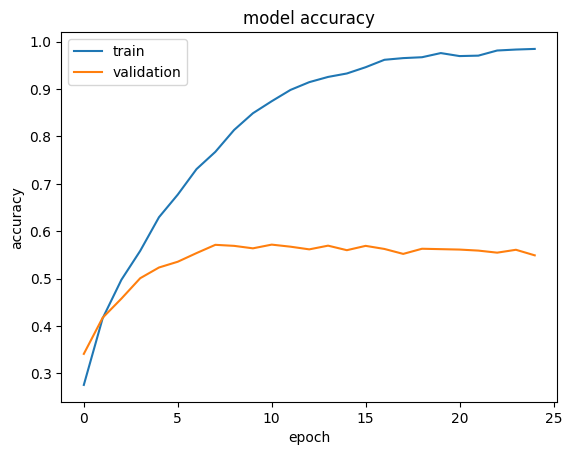

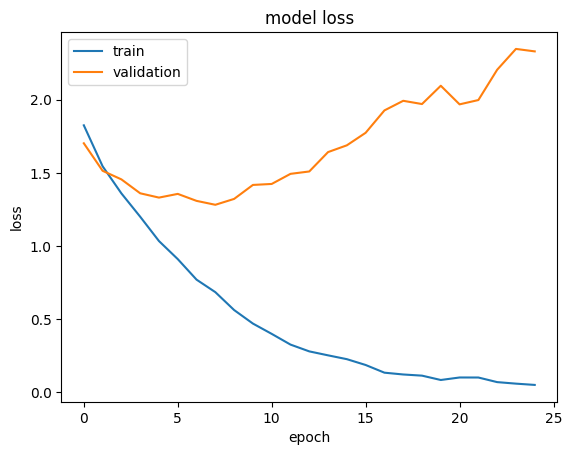

In [32]:
# Accuracy plot
plt.plot(histLSTM.history['accuracy'])
plt.plot(histLSTM.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(histLSTM.history['loss'])
plt.plot(histLSTM.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [33]:
modelBiLSTM = Sequential()
modelBiLSTM.add(Embedding(max_words, embedding_dim, embeddings_initializer=Constant(embedding_mat), input_length=max_len))
modelBiLSTM.add(tf.keras.layers.Bidirectional(LSTM(units=128, activation='tanh')))
modelBiLSTM.add(Dense(class_num, activation='softmax'))
modelBiLSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
modelBiLSTM.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 bidirectional (Bidirection  (None, 256)               234496    
 al)                                                             
                                                                 
 dense_6 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 1236295 (4.72 MB)
Trainable params: 1236295 (4.72 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
histBiLSTM = modelBiLSTM.fit(X_train, y_train, epochs=25, batch_size=128, validation_data = (X_test,y_test))

Epoch 1/25
42/42 [==============================] - 6s 105ms/step - loss: 1.8591 - accuracy: 0.2499 - val_loss: 1.7644 - val_accuracy: 0.3152
Epoch 2/25
42/42 [==============================] - 3s 81ms/step - loss: 1.5948 - accuracy: 0.3975 - val_loss: 1.5374 - val_accuracy: 0.4304
Epoch 3/25
42/42 [==============================] - 3s 71ms/step - loss: 1.3947 - accuracy: 0.4881 - val_loss: 1.4774 - val_accuracy: 0.4578
Epoch 4/25
42/42 [==============================] - 2s 52ms/step - loss: 1.2166 - accuracy: 0.5628 - val_loss: 1.3871 - val_accuracy: 0.4839
Epoch 5/25
42/42 [==============================] - 2s 47ms/step - loss: 1.0721 - accuracy: 0.6189 - val_loss: 1.3293 - val_accuracy: 0.5304
Epoch 6/25
42/42 [==============================] - 2s 47ms/step - loss: 0.9182 - accuracy: 0.6783 - val_loss: 1.2654 - val_accuracy: 0.5591
Epoch 7/25
42/42 [==============================] - 2s 46ms/step - loss: 0.7862 - accuracy: 0.7348 - val_loss: 1.2981 - val_accuracy: 0.5587
Epoch 8/25
4

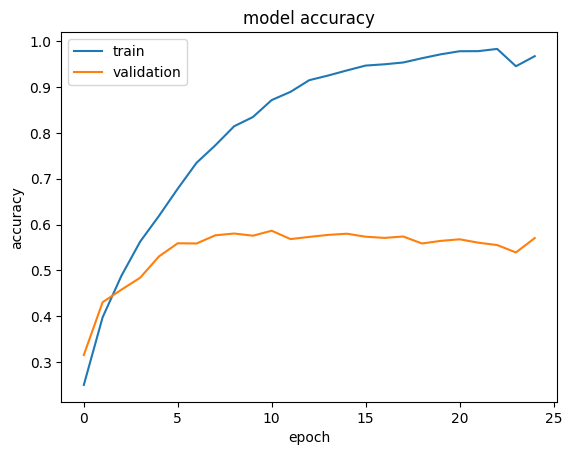

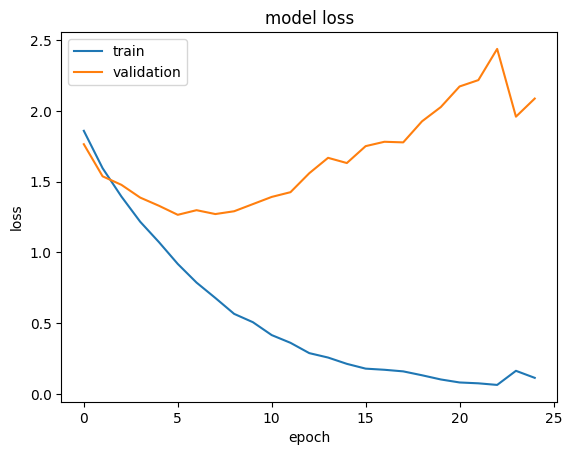

In [36]:
# Accuracy plot
plt.plot(histBiLSTM.history['accuracy'])
plt.plot(histBiLSTM.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(histBiLSTM.history['loss'])
plt.plot(histBiLSTM.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [38]:
message = ['i should not have told my friend to go away']

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=max_len)

start_time = time.time()
pred1 = modelCNN.predict(padded)
pred2 = modelCNN2.predict(padded)
pred3 = modelLSTM.predict(padded)
pred4 = modelBiLSTM.predict(padded)

print('Message: ' + str(message))
print('predicted model CNN 1: {} ({:.2f} seconds)'.format(class_name[np.argmax(pred1)], (time.time() - start_time)))
print('predicted model CNN 2: {} ({:.2f} seconds)'.format(class_name[np.argmax(pred2)], (time.time() - start_time)))
print('predicted model LSTM: {} ({:.2f} seconds)'.format(class_name[np.argmax(pred3)], (time.time() - start_time)))
print('predicted model BiLSTM: {} ({:.2f} seconds)'.format(class_name[np.argmax(pred4)], (time.time() - start_time)))

1/1 [==============================] - 0s 18ms/step
Message: ['i should not have told my friend to go away']
predicted model CNN 1: guilt (0.22 seconds)
predicted model CNN 2: guilt (0.22 seconds)
predicted model LSTM: guilt (0.22 seconds)
predicted model BiLSTM: guilt (0.22 seconds)


# Save models

In [44]:
modelCNN.save('modelCNN_Local.keras')
modelCNN2.save('modelCNN2_Local.keras')
modelLSTM.save('modelLSTM_Local.keras')
modelBiLSTM.save('modelBiLSTM_Local.keras')

# Load Saved Models

In [10]:
import keras
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.initializers import Constant
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from keras.models import Sequential,Model
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Input,Bidirectional
from keras.layers import *
import time
import pickle as pkl

modeltestCNN = keras.models.load_model('modelCNN_Local.keras')
modeltestCNN2 = keras.models.load_model('modelCNN2_Local.keras')
modeltestLSTM = keras.models.load_model('modelLSTM_Local.keras')
modeltestBiLSTM = keras.models.load_model('modelBiLSTM_Local.keras')

In [11]:
with open('tokenizerfile.pickle', 'rb') as file:
    tokenizer=pkl.load(file)
with open('sequencesfile.pickle', 'rb') as file:
    sequencesr=pkl.load(file)
with open('padded_sequencesfile.pickle', 'rb') as file:
    padded_sequences=pkl.load(file)

In [12]:
max_words = 10000
max_len = 100

class_num = 7
class_name = ['joy','fear','anger','sadness','disgust','shame','guilt']

embedding_dim = 100
embedding_mat = np.zeros((max_words, embedding_dim))
embedder = 'glove.6B.100d.txt'

with open(embedder) as f:
    for line in f:
        word, *vector = line.split()
        if word in tokenizer.word_index and int(tokenizer.word_index[word]) < max_words:
            idx = tokenizer.word_index[word]
            embedding_mat[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

In [13]:
message = ['i should not have told my friend to go away']

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=max_len)

start_time = time.time()
pred1 = modeltestCNN.predict(padded)
pred2 = modeltestCNN2.predict(padded)
pred3 = modeltestLSTM.predict(padded)
pred4 = modeltestBiLSTM.predict(padded)

print('Message: ' + str(message))
print('predicted model CNN 1: {} ({:.2f} seconds)'.format(class_name[np.argmax(pred1)], (time.time() - start_time)))
print('predicted model CNN 2: {} ({:.2f} seconds)'.format(class_name[np.argmax(pred2)], (time.time() - start_time)))
print('predicted model LSTM: {} ({:.2f} seconds)'.format(class_name[np.argmax(pred3)], (time.time() - start_time)))
print('predicted model BiLSTM: {} ({:.2f} seconds)'.format(class_name[np.argmax(pred4)], (time.time() - start_time)))

1/1 [==============================] - 0s 369ms/step
Message: ['i should not have told my friend to go away']
predicted model CNN 1: guilt (0.85 seconds)
predicted model CNN 2: guilt (0.85 seconds)
predicted model LSTM: guilt (0.85 seconds)
predicted model BiLSTM: guilt (0.85 seconds)
